# Space Mission Challenge - IEEE Hackathonn 2023
## Pumping Lemma Submission 

The year is 2030, a team of space enthusiasts launched a mission to explorea distant planet in a far-off galaxy. 

The mission was a challenging one, and the team had to overcome several obstacles to make it a success.

This event is about analyzing the data from the mission to determine its success rate and building an autonomous system for the spaceship.

## Importing libraries

In [2257]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

%matplotlib inline
sns.set()


In [2258]:
flights = pd.read_csv('synthetic_space_dataset.csv')

## Sample Data

In [2259]:
flights.sample(5)

,ship_id,launch_year,mission_duration_days,distance_to_planet_km,planet_gravity_m_s2,landing_latitude,landing_longitude,initial_speed_m_s,final_speed_m_s,fuel_consumption_kg,...,energy_capacity_kWh,communication_frequency_GHz,max_altitude_km,parachute_count,parachute_area_m2,heat_shield_material_id,heat_shield_thickness_cm,lander_leg_count,lander_leg_length_m,success_landing
17032,58,2029,281,1.181665e+06,27.983452,20,-126,22440,312,9449,...,6294,21,61,0,146,9,1,4,1,True
34690,28,2021,43,6.148911e+07,32.701094,-69,161,15425,128,1477,...,8311,9,130,2,86,6,4,4,1,False
19076,92,2023,440,4.103493e+08,40.444924,-42,-25,33495,114,8979,...,8949,5,96,0,48,8,4,4,4,False
41461,38,2026,406,3.598305e+07,33.964423,54,74,44929,17,7168,...,6015,9,111,3,74,2,19,4,2,True
36651,53,2021,379,1.060480e+08,46.423743,-87,94,24226,157,3662,...,7727,21,91,2,149,6,16,4,2,True


## Info about the data


In [2260]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ship_id                      60000 non-null  int64  
 1   launch_year                  60000 non-null  int64  
 2   mission_duration_days        60000 non-null  int64  
 3   distance_to_planet_km        60000 non-null  float64
 4   planet_gravity_m_s2          60000 non-null  float64
 5   landing_latitude             60000 non-null  int64  
 6   landing_longitude            60000 non-null  int64  
 7   initial_speed_m_s            60000 non-null  int64  
 8   final_speed_m_s              60000 non-null  int64  
 9   fuel_consumption_kg          60000 non-null  int64  
 10  crew_size                    60000 non-null  int64  
 11  total_weight_kg              60000 non-null  int64  
 12  engine_thrust_N              60000 non-null  float64
 13  engine_count    

## Exploratory Data Analysis

### Bad Landings vs Good Landings 
For this problem is useful to know how the ratio between successful landings vs unsuccessful landings

<AxesSubplot:xlabel='success_landing', ylabel='count'>

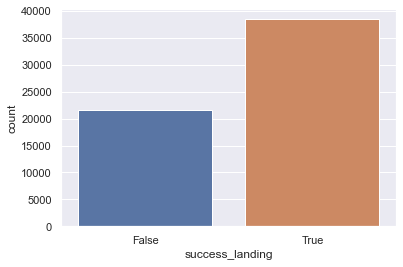

In [2261]:
sns.countplot(x='success_landing', data=flights)

A somewhat 2 to 1 ratio 

### The relation to that with crew size?

<AxesSubplot:xlabel='success_landing', ylabel='count'>

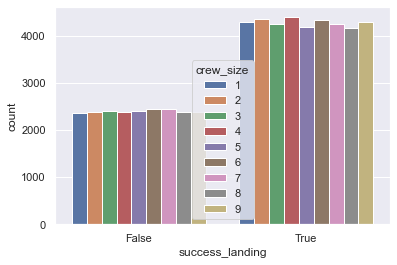

In [2262]:
sns.countplot(x='success_landing',hue='crew_size',data=flights)

It seems the size of the crew really does not matter much. Consider dropping crew size from the training

### Do solar panels matter?

<AxesSubplot:xlabel='success_landing', ylabel='count'>

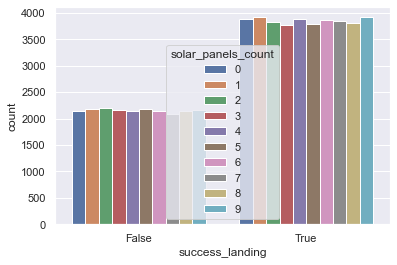

In [2263]:
sns.countplot(x='success_landing',hue='solar_panels_count',data=flights)

Solar panels do no impact the landing. Consider dropping from the training

### Does the engine count matters?

<AxesSubplot:xlabel='success_landing', ylabel='count'>

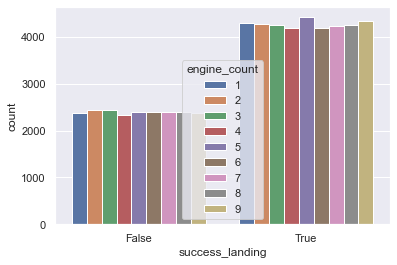

In [2264]:
sns.countplot(x='success_landing',hue='engine_count',data=flights)

Engine count does not matter. Consider dropping from training

### More parachutes, I guess?

<AxesSubplot:xlabel='success_landing', ylabel='count'>

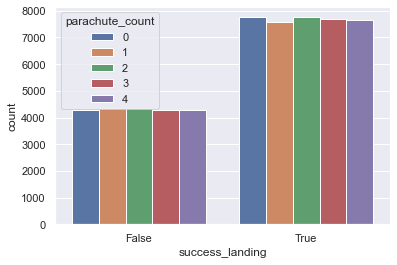

In [2265]:
sns.countplot(x='success_landing',hue='parachute_count',data=flights)

Nope, not at all...

### What about lander legs?! Does are definitely important!

<AxesSubplot:xlabel='success_landing', ylabel='count'>

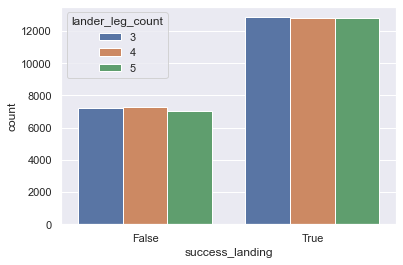

In [2266]:
sns.countplot(x='success_landing',hue='lander_leg_count',data=flights)

HAHAHAHHAHAHAHA NAAAAAAAHH

### What about the launch year?

<AxesSubplot:xlabel='success_landing', ylabel='count'>

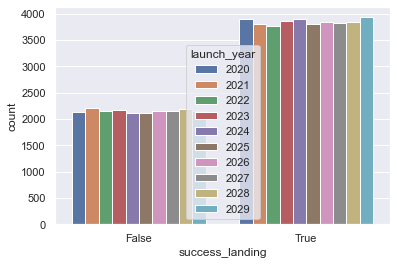

In [2267]:
sns.countplot(x='success_landing',hue='launch_year',data=flights)

### Heat shield material ID?

<AxesSubplot:xlabel='success_landing', ylabel='count'>

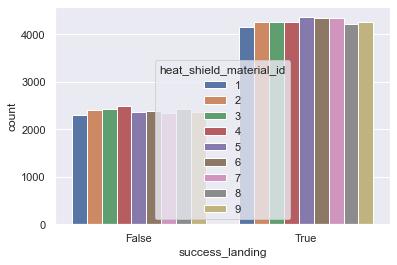

In [2268]:
sns.countplot(x='success_landing',hue='heat_shield_material_id',data=flights)

All seems normal

### Time to go with the big numbers
### Do landing speed has an effect?

<AxesSubplot:xlabel='success_landing', ylabel='final_speed_m_s'>

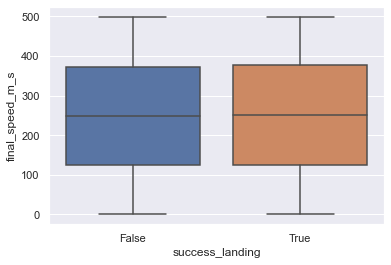

In [2269]:
sns.boxplot(x=flights['success_landing'], y=flights['final_speed_m_s'])

Nearly identicial 1:1 ratio. Final speed seems not like a factor. 

### Initial Speed?

<AxesSubplot:xlabel='success_landing', ylabel='initial_speed_m_s'>

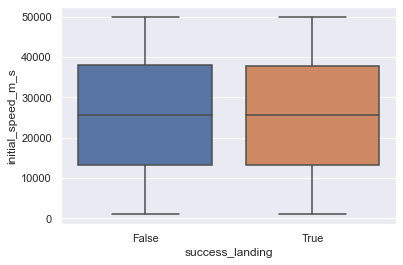

In [2270]:
sns.boxplot(x=flights['success_landing'], y=flights['initial_speed_m_s'])

Same story.

### Total weight?

<AxesSubplot:xlabel='success_landing', ylabel='total_weight_kg'>

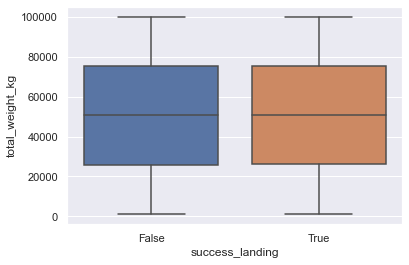

In [2271]:
sns.boxplot(x=flights['success_landing'], y=flights['total_weight_kg'])

Total wegiht is fine.

### Landing latitude?

<AxesSubplot:xlabel='success_landing', ylabel='landing_latitude'>

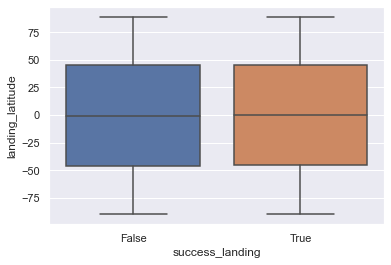

In [2272]:
sns.boxplot(x=flights['success_landing'], y=flights['landing_latitude'])

Latitude is fine.

### Longitude maybe?

<AxesSubplot:xlabel='success_landing', ylabel='landing_longitude'>

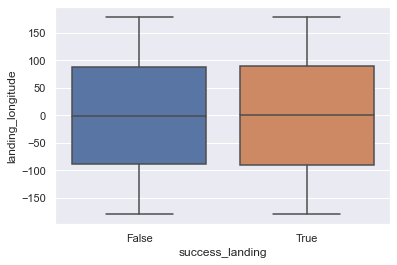

In [2273]:
sns.boxplot(x=flights['success_landing'], y=flights['landing_longitude'])

Longitude is fine.

### Mission duration?

<AxesSubplot:xlabel='success_landing', ylabel='mission_duration_days'>

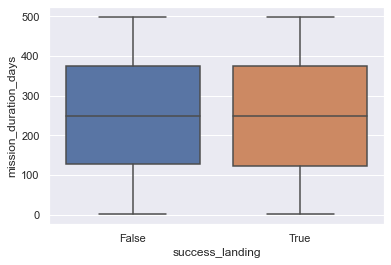

In [2274]:
sns.boxplot(x=flights['success_landing'], y=flights['mission_duration_days'])

Is fine

### Engine thrust?

<AxesSubplot:xlabel='success_landing', ylabel='engine_thrust_N'>

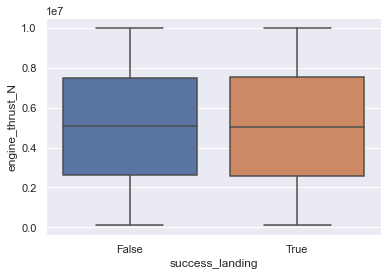

In [2275]:
sns.boxplot(x=flights['success_landing'], y=flights['engine_thrust_N'])

No issue

### Distance to planet?

<AxesSubplot:xlabel='success_landing', ylabel='distance_to_planet_km'>

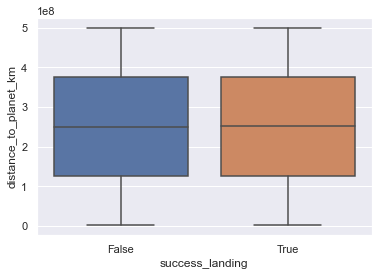

In [2276]:
sns.boxplot(x=flights['success_landing'], y=flights['distance_to_planet_km'])

Ok... No

### Planet gravity?

<AxesSubplot:xlabel='success_landing', ylabel='planet_gravity_m_s2'>

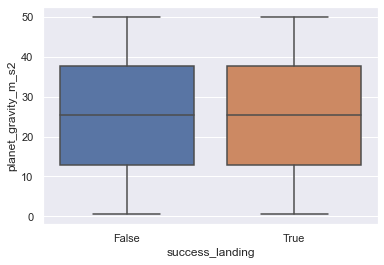

In [2277]:
sns.boxplot(x=flights['success_landing'], y=flights['planet_gravity_m_s2'])

Normal, ok

### Energy capacity?

<AxesSubplot:xlabel='success_landing', ylabel='energy_capacity_kWh'>

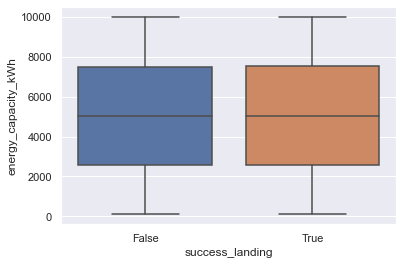

In [2278]:
sns.boxplot(x=flights['success_landing'], y=flights['energy_capacity_kWh'])

Nothing new

### Communication frecuency? 

<AxesSubplot:xlabel='success_landing', ylabel='communication_frequency_GHz'>

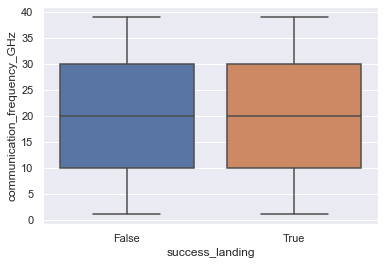

In [2279]:
sns.boxplot(x=flights['success_landing'], y=flights['communication_frequency_GHz'])

Radio is not a problem

### Max altitude?

<AxesSubplot:xlabel='success_landing', ylabel='max_altitude_km'>

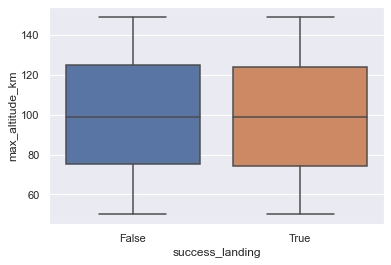

In [2280]:
sns.boxplot(x=flights['success_landing'], y=flights['max_altitude_km'])

The bad landings seems to go a tad higher. 

### Heat shield thickness?

<AxesSubplot:xlabel='success_landing', ylabel='heat_shield_thickness_cm'>

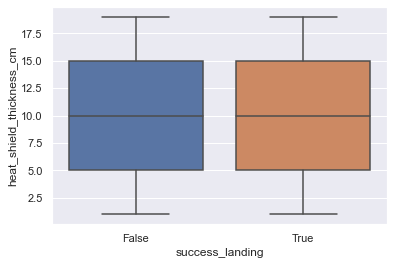

In [2281]:
sns.boxplot(x=flights['success_landing'], y=flights['heat_shield_thickness_cm'])

No change

### Lander leg length?

<AxesSubplot:xlabel='success_landing', ylabel='lander_leg_length_m'>

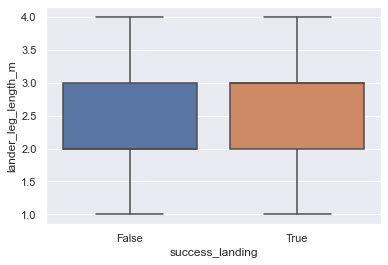

In [2282]:
sns.boxplot(x=flights['success_landing'], y=flights['lander_leg_length_m'])

No difference

### Parachute area?

<AxesSubplot:xlabel='success_landing', ylabel='parachute_area_m2'>

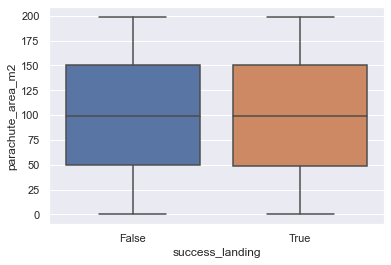

In [2283]:
sns.boxplot(x=flights['success_landing'], y=flights['parachute_area_m2']) 

Is it me or is data science boring 98% of the time?

### Fuel consumption?

<AxesSubplot:xlabel='success_landing', ylabel='fuel_consumption_kg'>

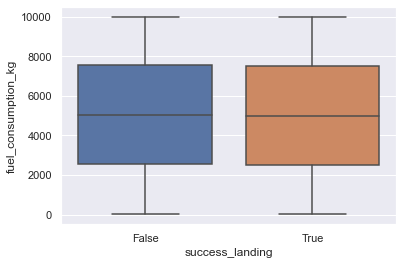

In [2284]:
sns.boxplot(x=flights['success_landing'], y=flights['fuel_consumption_kg'])

## One Hot Encoding for success_landing

In [2285]:
success_landing = pd.get_dummies(flights['success_landing'], drop_first=True, prefix="success_landing")
flights = flights.drop('success_landing', axis=1)
flights = pd.concat([flights, success_landing], axis=1)
flights.head(5)

,ship_id,launch_year,mission_duration_days,distance_to_planet_km,planet_gravity_m_s2,landing_latitude,landing_longitude,initial_speed_m_s,final_speed_m_s,fuel_consumption_kg,...,energy_capacity_kWh,communication_frequency_GHz,max_altitude_km,parachute_count,parachute_area_m2,heat_shield_material_id,heat_shield_thickness_cm,lander_leg_count,lander_leg_length_m,success_landing_True
0,52,2028,204,3.847606e+08,21.682092,22,-64,12692,385,4613,...,360,24,76,4,168,1,14,4,4,0
1,93,2022,435,1.827605e+08,1.961883,53,55,31646,35,3308,...,591,38,63,4,176,2,19,5,1,1
2,15,2025,81,3.582505e+07,13.132886,84,12,35836,163,5238,...,5396,33,134,2,34,3,18,3,3,1
3,72,2028,420,1.702923e+08,29.242663,-47,122,18525,118,1733,...,7628,30,142,4,190,9,3,4,3,1
4,61,2028,231,1.773798e+07,17.780109,71,-129,45515,313,667,...,8988,22,89,1,41,9,16,5,1,0


## Removing unnecessary data

In [2286]:
flights = flights.drop('ship_id', axis=1)
flights = flights.drop('initial_speed_m_s', axis=1)
flights = flights.drop('launch_year', axis=1)
flights = flights.drop('solar_panels_count', axis=1)
flights = flights.drop('heat_shield_material_id', axis=1)
flights = flights.drop('mission_duration_days', axis=1)
flights = flights.drop('communication_frequency_GHz', axis=1)
flights = flights.drop('landing_latitude', axis=1)
flights.head(5)


,distance_to_planet_km,planet_gravity_m_s2,landing_longitude,final_speed_m_s,fuel_consumption_kg,crew_size,total_weight_kg,engine_thrust_N,engine_count,energy_capacity_kWh,max_altitude_km,parachute_count,parachute_area_m2,heat_shield_thickness_cm,lander_leg_count,lander_leg_length_m,success_landing_True
0,3.847606e+08,21.682092,-64,385,4613,2,79100,8.459809e+05,4,360,76,4,168,14,4,4,0
1,1.827605e+08,1.961883,55,35,3308,4,53422,4.172740e+06,9,591,63,4,176,19,5,1,1
2,3.582505e+07,13.132886,12,163,5238,7,40268,4.143042e+06,1,5396,134,2,34,18,3,3,1
3,1.702923e+08,29.242663,122,118,1733,3,87943,9.618781e+05,2,7628,142,4,190,3,4,3,1
4,1.773798e+07,17.780109,-129,313,667,1,17810,1.902523e+06,1,8988,89,1,41,16,5,1,0


## Test Train

In [2287]:
y = flights['success_landing_True']
x = flights.drop('success_landing_True', axis=1)

In [2288]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y)

## Train the model

In [2289]:
model = LogisticRegression(class_weight='balanced')
model.fit(x_training_data, y_training_data)

LogisticRegression(class_weight='balanced')

## Predicting


In [2290]:
prediction = model.predict(x_test_data)

print(classification_report(y_test_data, prediction))

              precision    recall  f1-score   support

           0       0.36      0.38      0.37      5324
           1       0.65      0.63      0.64      9676

    accuracy                           0.54     15000
   macro avg       0.50      0.50      0.50     15000
weighted avg       0.55      0.54      0.54     15000

